In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

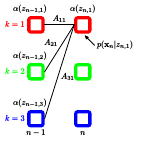

Fig.12 Illustration of the forward recursion (13.36) for evaluation of the α variables. In this fragment of the lattice, we see that the quantity α(zn1 ) is obtained by taking the elements α(zn−1,j ) of α(zn−1 ) at step n−1 and summing them up with weights given by Aj1 , corresponding to the val- ues of $p(z_n |z_n−1 )$, and then multiplying by the data contribution $p(x_n |z_n1 )$.


### Forward and Backward Recursion for HMMs in EM Algorithm

#### Forward Recursion: Evaluating $ \alpha(z_n) $
The forward recursion computes the variables $ \alpha(z_n) $, representing the joint probability $ p(x_{1:n}, z_n) $. This is accomplished recursively using:

$$
\alpha(z_n) = \left( \sum_{z_{n-1}} \alpha(z_{n-1}) p(z_n | z_{n-1}) \right) p(x_n | z_n)
$$

##### Initial Condition
At \( n = 1 \), the recursion starts with:

$$
\alpha(z_1) = p(x_1, z_1) = p(z_1)p(x_1 | z_1) = \pi_k p(x_1 | \phi_k), \quad \text{for } k = 1, \dots, K
$$

##### Computational Cost
Each step involves summing over $ K $ terms for $ K $ values of $ z_n $, resulting in a computational complexity of $ O(K^2) $ per step. For $ N $ steps, the total cost is $ O(K^2 N) $.

---

#### Backward Recursion: Evaluating $ \beta(z_n) $
The backward recursion computes $ \beta(z_n) $, representing the probability $ p(x_{n+1:N} | z_n) $. The recursion relation is:

$$
\beta(z_n) = \sum_{z_{n+1}} \beta(z_{n+1}) p(x_{n+1} | z_{n+1}) p(z_{n+1} | z_n)
$$

##### Initial Condition
For the last node $ n = N $, the recursion initializes with:

$$
\beta(z_N) = 1, \quad \text{for all } z_N
$$

##### Computational Cost
The structure of the recursion also implies a complexity of $ O(K^2 N) $.

---

#### Evaluating $ p(X) $: The Likelihood Function
The likelihood function $ p(X) $ is essential for monitoring EM optimization. It is computed as:

$$
p(X) = \sum_{z_n} \alpha(z_n) \beta(z_n)
$$

---

#### Estimating Model Parameters: $ \mu_k $
The M-step updates model parameters using the posterior probabilities. For $ \mu_k $, the update equation is:

$$
\mu_k = \frac{\sum_{n} \gamma(z_n^k)x_n}{\sum_{n} \gamma(z_n^k)}
$$

Where $ \gamma(z_n^k) $ is the responsibility term given by:

$$
\gamma(z_n^k) = \alpha(z_n^k) \beta(z_n^k)
$$



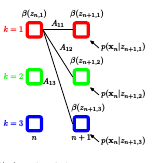


Fig.13 Illustration of the backward recursion (13.38) for evaluation of the β variables. In this fragment of the lattice, we see that the quantity β(zn1 ) is obtained by taking the components β(zn+1,k ) of β(zn+1 ) at step n + 1 and summing them up with weights given by the products of A1k , correspond- ing to the values of p(zn+1 |zn ) and the cor- responding values of the emission density p(xn |zn+1,k ).


## Hidden Markov Model Likelihood Evaluation and EM Algorithm

To evaluate the likelihood function, we compute the following sum for any convenient choice of $ n $. For instance, if we only want to evaluate the likelihood function, we can run the $ \alpha $ recursion from the start to the end of the chain and use the result for $ n = N $, making use of the fact that $ \beta(z_N) $ is a vector of 1s. In this case, no $ \beta $ recursion is required, and we simply have:

$$
p(X) = \sum_{z_N} \alpha(z_N). \tag{13.42}
$$

### Interpretation of $ p(X) $

Recall that to compute the likelihood, we sum over all possible values of $ Z $ in the joint distribution $ p(X, Z) $. Each such value represents a particular choice of hidden states for every time step. In other words, every term in the summation is a path through the lattice diagram, and there are exponentially many such paths.

By expressing the likelihood function in the form of Equation $ (13.42) $, we reduce the computational cost from exponential in the length of the chain to linear. This is achieved by swapping the order of the summation and multiplications, so that at each time step $ n $, we sum the contributions from all paths passing through each of the states $ z_{nk} $ to compute the intermediate quantities $ \alpha(z_n) $.

### Evaluation of $ \xi(z_{n-1}, z_n) $

Next, we consider the evaluation of the quantities $ \xi(z_{n-1}, z_n) $, which correspond to the conditional probabilities $ p(z_{n-1}, z_n | X) $ for each of the $ K \times K $ settings of $ (z_{n-1}, z_n) $. Using the definition of $ \xi(z_{n-1}, z_n) $ and applying Bayes' theorem, we have:

$$
\xi(z_{n-1}, z_n) = p(z_{n-1}, z_n | X) = \frac{p(X | z_{n-1}, z_n)p(z_{n-1}, z_n)}{p(X)}.
$$

Expanding the terms:

$$
\xi(z_{n-1}, z_n) = \frac{p(x_1, \dots, x_{n-1} | z_{n-1})p(x_n | z_n)p(x_{n+1}, \dots, x_N | z_n)p(z_n | z_{n-1})p(z_{n-1})}{p(X)}.
$$

Using the definitions of $ \alpha(z_n) $ and $ \beta(z_n) $ given by Equations $ (13.34) $ and $ (13.35) $, and leveraging the conditional independence property (13.29), we simplify:

$$
\xi(z_{n-1}, z_n) = \frac{\alpha(z_{n-1})p(x_n | z_n)p(z_n | z_{n-1})\beta(z_n)}{p(X)}. \tag{13.43}
$$

Thus, $ \xi(z_{n-1}, z_n) $ can be calculated directly using the results of the $ \alpha $ and $ \beta $ recursions.

### Steps for Training a Hidden Markov Model Using EM Algorithm

1. **Initialization**:
   - Choose initial parameters $ \theta^{\text{old}} $, where $ \theta = (\pi, A, \phi) $.
   - Initialize $ A $ and $ \pi $ either uniformly or randomly from a uniform distribution, ensuring non-negativity and summation constraints.
   - For $ \phi $, initialization depends on the distribution. For example, in the case of Gaussians:
     - Initialize $ \mu_k $ using the K-means algorithm.
     - Initialize $ \Sigma_k $ as the covariance matrix of the corresponding K-means cluster.

2. **Forward and Backward Recursions**:
   - Run the $ \alpha $ recursion (forward).
   - Run the $ \beta $ recursion (backward).

3. **Evaluate Sufficient Statistics**:
   - Compute $ \gamma(z_n) $ and $ \xi(z_{n-1}, z_n) $ using the recursion results.

4. **Likelihood Evaluation**:
   - Optionally, evaluate the likelihood function $ p(X) $ during this stage.

These steps are iterated until convergence to maximize the likelihood of the observed data under the model.



## Hidden Markov Model: E-Step, M-Step, and Predictive Distribution

### E-Step and M-Step in the EM Algorithm

After completing the E-step, we use the results to find a revised set of parameters $ \theta^{\text{new}} $ using the M-step equations from Section 13.2.1. The algorithm alternates between E and M steps until a convergence criterion is satisfied, such as when the change in the likelihood function falls below a predefined threshold.

In these recursion relations, the observations enter through conditional distributions of the form $ p(x_n | z_n) $. The recursions are independent of the type or dimensionality of the observed variables or the form of this conditional distribution, provided its value can be computed for each of the $ K $ possible states of $ z_n $. Since the observed variables $ \{x_n\} $ are fixed, the quantities $ p(x_n | z_n) $ can be pre-computed as functions of $ z_n $ at the start of the EM algorithm and remain fixed throughout.

### Effective Training of HMMs

The maximum likelihood approach is most effective when the number of data points is large relative to the number of parameters. Hidden Markov models can be trained effectively using maximum likelihood if the training sequence is sufficiently long. Alternatively, multiple shorter sequences can be used, requiring a straightforward modification of the HMM EM algorithm. For left-to-right models, this is particularly important since, in a given observation sequence, a state transition corresponding to a non-diagonal element of $ A $ may be seen at most once.

### Predictive Distribution

Another quantity of interest is the predictive distribution, where the observed data is $ X = \{x_1, \dots, x_N\} $, and we wish to predict $ x_{N+1} $. This is useful for real-time applications such as financial forecasting. Using the sum and product rules along with the conditional independence properties (13.29) and (13.31), we derive:

$$
p(x_{N+1} | X) = \sum_{z_{N+1}} p(x_{N+1}, z_{N+1} | X).
$$

Expanding the terms:

$$
p(x_{N+1} | X) = \sum_{z_{N+1}} p(x_{N+1} | z_{N+1}) p(z_{N+1} | X).
$$

Using the marginalization property:

$$
p(x_{N+1} | X) = \sum_{z_{N+1}} p(x_{N+1} | z_{N+1}) \sum_{z_N} p(z_{N+1}, z_N | X).
$$

Substituting the joint probability:

$$
p(x_{N+1} | X) = \sum_{z_{N+1}} p(x_{N+1} | z_{N+1}) \sum_{z_N} p(z_{N+1} | z_N) p(z_N | X).
$$

Simplifying further:

$$
p(x_{N+1} | X) = \frac{1}{p(X)} \sum_{z_{N+1}} \sum_{z_N} p(x_{N+1} | z_{N+1}) p(z_{N+1} | z_N) \alpha(z_N). \tag{13.44}
$$

This can be evaluated by first running a forward $ \alpha $ recursion and then computing the final summations over $ z_N $ and $ z_{N+1} $. The result of the first summation over $ z_N $ can be stored and used once $ x_{N+1} $ is observed to run the $ \alpha $ recursion forward to the next step for predicting $ x_{N+2} $.

### Efficient Storage for Real-Time Applications

In Equation $ (13.44) $, the influence of all data from $ x_1 $ to $ x_N $ is summarized in the $ K $ values of $ \alpha(z_N) $. Thus, the predictive distribution can be carried forward indefinitely using a fixed amount of storage, making it suitable for real-time applications.

### Extensions to Maximum Likelihood Estimation

![image.png](attachment:image.png)

Fig.14 A fragment of the fac- tor graph representation for the hidden Markov model.

The parameter estimation framework discussed above for HMMs can be extended to:

- **Regularized Maximum Likelihood**: Introduce priors over the model parameters $ \pi, A, \phi $ and estimate their values by maximizing the posterior probability. This involves adding the log of the prior distribution $ p(\theta) $ to the function $ Q(\theta, \theta^{\text{old}}) $ during the M-step.

- **Bayesian Treatment**: Use variational methods to marginalize over parameter distributions $ (\pi, A, \phi) $, leading to a fully Bayesian treatment of the HMM. As with maximum likelihood, this approach requires a two-pass forward-backward recursion to compute posterior probabilities.

```


In [2]:
##```python
import numpy as np

class HiddenMarkovModel:
    def __init__(self, A, B, pi):
        """
        Initialize the HMM parameters.
        A: State transition matrix (KxK)
        B: Observation probability matrix (KxM)
        pi: Initial state distribution (K)
        """
        self.A = A
        self.B = B
        self.pi = pi

    def forward(self, observations):
        """Forward algorithm to compute \( \alpha \)."""
        N = len(observations)
        K = self.A.shape[0]
        alpha = np.zeros((N, K))

        # Initialization
        alpha[0, :] = self.pi * self.B[:, observations[0]]

        # Recursion
        for t in range(1, N):
            for j in range(K):
                alpha[t, j] = np.sum(alpha[t - 1, :] * self.A[:, j]) * self.B[j, observations[t]]

        return alpha

    def backward(self, observations):
        """Backward algorithm to compute \( \beta \)."""
        N = len(observations)
        K = self.A.shape[0]
        beta = np.zeros((N, K))

        # Initialization
        beta[N - 1, :] = 1

        # Recursion
        for t in range(N - 2, -1, -1):
            for i in range(K):
                beta[t, i] = np.sum(self.A[i, :] * self.B[:, observations[t + 1]] * beta[t + 1, :])

        return beta

    def baum_welch(self, observations, max_iter=100, tol=1e-6):
        """Baum-Welch algorithm for training HMM parameters."""
        N = len(observations)
        K = self.A.shape[0]
        M = self.B.shape[1]

        for iteration in range(max_iter):
            alpha = self.forward(observations)
            beta = self.backward(observations)

            # Compute \( \xi \) and \( \gamma \)
            xi = np.zeros((N - 1, K, K))
            gamma = np.zeros((N, K))

            for t in range(N - 1):
                denom = np.sum(alpha[t, :] @ self.A * self.B[:, observations[t + 1]] * beta[t + 1, :])
                for i in range(K):
                    for j in range(K):
                        xi[t, i, j] = alpha[t, i] * self.A[i, j] * self.B[j, observations[t + 1]] * beta[t + 1, j] / denom

            gamma = np.sum(xi, axis=2)

            # Update \( \pi \), \( A \), and \( B \)
            self.pi = gamma[0, :]
            self.A = np.sum(xi, axis=0) / np.sum(gamma[:-1, :], axis=0)[:, None]

            for j in range(M):
                mask = observations == j
                self.B[:, j] = np.sum(gamma[mask, :], axis=0) / np.sum(gamma, axis=0)

            # Check convergence
            likelihood = np.sum(np.log(np.sum(alpha[-1, :])))
            if iteration > 0 and abs(likelihood - prev_likelihood) < tol:
                break

            prev_likelihood = likelihood

    def predict_next(self, alpha, x_next):
        """Predict the next observation \( x_{N+1} \)."""
        pass


In [4]:

import numpy as np
import matplotlib.pyplot as plt

class HiddenMarkovModel:
    def __init__(self, A, B, pi):
        """
        Initialize the HMM parameters.
        A: State transition matrix (KxK)
        B: Observation probability matrix (KxM)
        pi: Initial state distribution (K)
        """
        self.A = A
        self.B = B
        self.pi = pi

    def forward(self, observations):
        """Forward algorithm to compute \( \alpha \)."""
        N = len(observations)
        K = self.A.shape[0]
        alpha = np.zeros((N, K))

        # Initialization
        alpha[0, :] = self.pi * self.B[:, observations[0]]

        # Recursion
        for t in range(1, N):
            for j in range(K):
                alpha[t, j] = np.sum(alpha[t - 1, :] * self.A[:, j]) * self.B[j, observations[t]]

        return alpha

    def backward(self, observations):
        """Backward algorithm to compute \( \beta \)."""
        N = len(observations)
        K = self.A.shape[0]
        beta = np.zeros((N, K))

        # Initialization
        beta[N - 1, :] = 1

        # Recursion
        for t in range(N - 2, -1, -1):
            for i in range(K):
                beta[t, i] = np.sum(self.A[i, :] * self.B[:, observations[t + 1]] * beta[t + 1, :])

        return beta

    def baum_welch(self, observations, max_iter=100, tol=1e-6):
        """Baum-Welch algorithm for training HMM parameters."""
        N = len(observations)
        K = self.A.shape[0]
        M = self.B.shape[1]

        for iteration in range(max_iter):
            alpha = self.forward(observations)
            beta = self.backward(observations)

            # Compute \( \xi \) and \( \gamma \)
            xi = np.zeros((N - 1, K, K))
            gamma = np.zeros((N, K))

            for t in range(N - 1):
                denom = np.sum(alpha[t, :] @ self.A * self.B[:, observations[t + 1]] * beta[t + 1, :])
                for i in range(K):
                    for j in range(K):
                        xi[t, i, j] = alpha[t, i] * self.A[i, j] * self.B[j, observations[t + 1]] * beta[t + 1, j] / denom

            gamma = np.sum(xi, axis=2)

            # Update \( \pi \), \( A \), and \( B \)
            self.pi = gamma[0, :]
            self.A = np.sum(xi, axis=0) / np.sum(gamma[:-1, :], axis=0)[:, None]

            for j in range(M):
                mask = observations == j
                self.B[:, j] = np.sum(gamma[mask, :], axis=0) / np.sum(gamma, axis=0)

            # Check convergence
            likelihood = np.sum(np.log(np.sum(alpha[-1, :])))
            if iteration > 0 and abs(likelihood - prev_likelihood) < tol:
                break

            prev_likelihood = likelihood

    def predict_next(self, alpha, x_next):
        """Predict the next observation \( x_{N+1} \)."""
        pass

# Generate synthetic data
np.random.seed(42)

# Parameters
A = np.array([[0.7, 0.3], [0.4, 0.6]])
B = np.array([[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]])
pi = np.array([0.6, 0.4])

observations = np.random.choice([0, 1, 2], size=100, p=[0.4, 0.4, 0.2])

# Initialize HMM
hmm = HiddenMarkovModel(A, B, pi)

# Train HMM using Baum-Welch
hmm.baum_welch(observations)

# Plot the training process
alpha = hmm.forward(observations)
time_steps = range(len(observations))

plt.figure(figsize=(10, 6))
plt.plot(time_steps, np.sum(alpha, axis=1), label="Likelihood Over Time")
plt.title("Forward Algorithm Likelihood")
plt.xlabel("Time Step")
plt.ylabel("Likelihood")
plt.legend()
plt.show()



IndexError: boolean index did not match indexed array along dimension 0; dimension is 99 but corresponding boolean dimension is 100

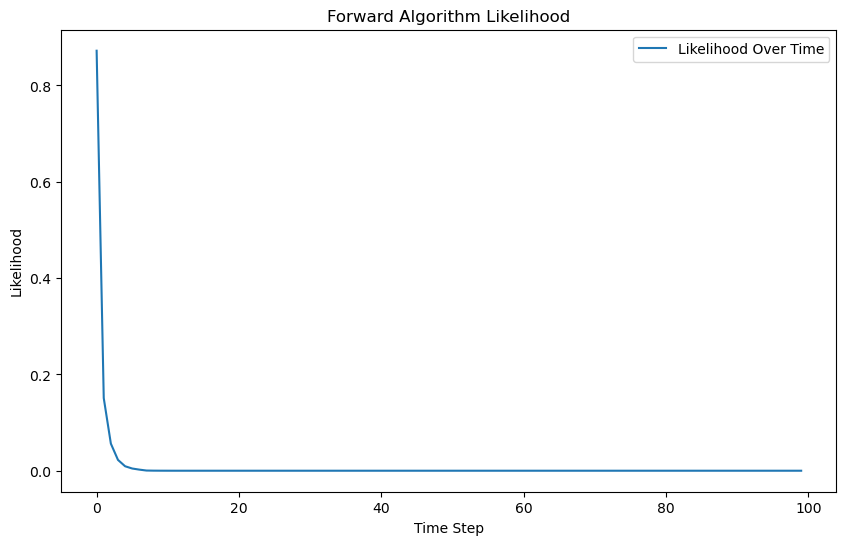

In [6]:

import numpy as np
import matplotlib.pyplot as plt

class HiddenMarkovModel:
    def __init__(self, A, B, pi):
        """
        Initialize the HMM parameters.
        A: State transition matrix (KxK)
        B: Observation probability matrix (KxM)
        pi: Initial state distribution (K)
        """
        self.A = A
        self.B = B
        self.pi = pi

    def forward(self, observations):
        """Forward algorithm to compute \( \alpha \)."""
        N = len(observations)
        K = self.A.shape[0]
        alpha = np.zeros((N, K))

        # Initialization
        alpha[0, :] = self.pi * self.B[:, observations[0]]

        # Recursion
        for t in range(1, N):
            for j in range(K):
                alpha[t, j] = np.sum(alpha[t - 1, :] * self.A[:, j]) * self.B[j, observations[t]]

        return alpha

    def backward(self, observations):
        """Backward algorithm to compute \( \beta \)."""
        N = len(observations)
        K = self.A.shape[0]
        beta = np.zeros((N, K))

        # Initialization
        beta[N - 1, :] = 1

        # Recursion
        for t in range(N - 2, -1, -1):
            for i in range(K):
                beta[t, i] = np.sum(self.A[i, :] * self.B[:, observations[t + 1]] * beta[t + 1, :])

        return beta

    def baum_welch(self, observations, max_iter=100, tol=1e-6):
        """Baum-Welch algorithm for training HMM parameters."""
        N = len(observations)
        K = self.A.shape[0]
        M = self.B.shape[1]

        for iteration in range(max_iter):
            alpha = self.forward(observations)
            beta = self.backward(observations)

            # Compute \( \xi \) and \( \gamma \)
            xi = np.zeros((N - 1, K, K))
            gamma = np.zeros((N, K))

            for t in range(N - 1):
                denom = np.sum(alpha[t, :] @ self.A * self.B[:, observations[t + 1]] * beta[t + 1, :])
                for i in range(K):
                    for j in range(K):
                        xi[t, i, j] = alpha[t, i] * self.A[i, j] * self.B[j, observations[t + 1]] * beta[t + 1, j] / denom

            gamma = np.sum(xi, axis=2)
            gamma = np.vstack((gamma, alpha[-1, :] / np.sum(alpha[-1, :])))  # Append last state

            # Update \( \pi \), \( A \), and \( B \)
            self.pi = gamma[0, :]
            self.A = np.sum(xi, axis=0) / np.sum(gamma[:-1, :], axis=0)[:, None]

            for j in range(M):
                mask = (observations == j)
                self.B[:, j] = np.sum(gamma[mask, :], axis=0) if np.any(mask) else 0

            # Normalize B to handle numerical issues
            self.B = self.B / np.sum(self.B, axis=1, keepdims=True)

            # Check convergence
            likelihood = np.sum(np.log(np.sum(alpha[-1, :])))
            if iteration > 0 and abs(likelihood - prev_likelihood) < tol:
                break

            prev_likelihood = likelihood

    def predict_next(self, alpha, x_next):
        """Predict the next observation \( x_{N+1} \)."""
        pass

# Generate synthetic data
np.random.seed(42)

# Parameters
A = np.array([[0.7, 0.3], [0.4, 0.6]])
B = np.array([[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]])
pi = np.array([0.6, 0.4])

# Simulate observations
true_observations = np.random.choice([0, 1, 2], size=100, p=[0.4, 0.4, 0.2])

# Initialize HMM
hmm = HiddenMarkovModel(A, B, pi)

# Train HMM using Baum-Welch
hmm.baum_welch(true_observations)

# Plot the training process
alpha = hmm.forward(true_observations)
time_steps = range(len(true_observations))

plt.figure(figsize=(10, 6))
plt.plot(time_steps, np.sum(alpha, axis=1), label="Likelihood Over Time")
plt.title("Forward Algorithm Likelihood")
plt.xlabel("Time Step")
plt.ylabel("Likelihood")
plt.legend()
plt.show()




## The Sum-Product Algorithm for the HMM

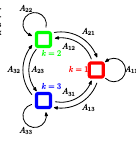

Figure 13.6 Transition diagram showing a model whose la- tent variables have three possible states corre- sponding to the three boxes. The black lines denote the elements of the transition matrix Ajk .

The directed graph that represents the hidden Markov model, shown in Figure 13.5, is a tree and so we can solve the problem of finding local marginals for the hidden variables using the sum-product algorithm. Not surprisingly, this turns out to be equivalent to the forward-backward algorithm considered in the previous section, and so the sum-product algorithm therefore provides us with a simple way to derive the alpha-beta recursion formulae.

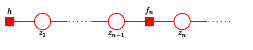

Fig.5 We can represent sequential data using a Markov chain of latent variables, with each observation conditioned on the state of the corresponding latent variable. This important graphical structure forms the foundation both for the hidden Markov model and for linear dynamical systems.

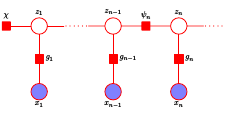

Fig.14 A fragment of the fac- tor graph representation for the hidden Markov model.

We begin by transforming the directed graph of Figure 13.5 into a factor graph, of which a representative fragment is shown in Figure 13.14. This form of the factor graph shows all variables, both latent and observed, explicitly. However, for the purpose of solving the inference problem, we shall always be conditioning on the variables $ x_1, \ldots, x_N $, and so we can simplify the factor graph by absorbing the emission probabilities into the transition probability factors. This leads to the simplified factor graph representation in Fig.15, in which the factors are given by

$$
h(z_1) = p(z_1) p(x_1 | z_1) \tag{13.45}
$$

and

$$
f_n(z_{n-1}, z_n) = p(z_n | z_{n-1}) p(x_n | z_n) \tag{13.46}
$$

### Deriving the Alpha-Beta Algorithm

To derive the alpha-beta algorithm, we denote the final hidden variable $ z_N $ as the root node, and first pass messages from the leaf node $ h $ to the root. From the general results (8.66) and (8.69) for message propagation, we see that the messages which are propagated in the hidden Markov model take the form

$$
\mu_{z_{n-1} \to f_n}(z_{n-1}) = \mu_{f_{n-1} \to z_{n-1}}(z_{n-1}) \tag{13.47}
$$

and

$$
\mu_{f_n \to z_n}(z_n) = f_n(z_{n-1}, z_n) \mu_{z_{n-1} \to f_n}(z_{n-1}) \tag{13.48}
$$

These equations represent the propagation of messages forward along the chain and are equivalent to the alpha recursions derived in the previous section, as we shall now show. Note that because the variable nodes $ z_n $ have only two neighbours, they perform no computation. We can eliminate $ \mu_{z_{n-1} \to f_n}(z_{n-1}) $ from (13.48) using (13.47) to give a recursion for the $ f \to z $ messages of the form

$$
\mu_{f_n \to z_n}(z_n) = f_n(z_{n-1}, z_n) \mu_{f_{n-1} \to z_{n-1}}(z_{n-1}) \tag{13.49}
$$

If we now recall the definition (13.46), and if we define

$$
\alpha(z_n) = \mu_{f_n \to z_n}(z_n) \tag{13.50}
$$

then we obtain the alpha recursion given by (13.36). We also need to verify that the quantities $ \alpha(z_n) $ are themselves equivalent to those defined previously. This is easily done by using the initial condition (8.71) and noting that

$$
\alpha(z_1) = h(z_1) = p(z_1) p(x_1 | z_1)
$$

which is identical to (13.37). Because the initial $ \alpha $ is the same, and because they are iteratively computed using the same equation, all subsequent $ \alpha $ quantities must be the same.

### Beta Propagation

Next we consider the messages that are propagated from the root node back to the leaf node. These take the form

$$
\mu_{f_{n+1} \to f_n}(z_n) = f_{n+1}(z_n, z_{n+1}) \mu_{f_{n+2} \to f_{n+1}}(z_{n+1}) \tag{13.51}
$$

where, as before, we have eliminated the messages of the type $ z \to f $ since the variable nodes perform no computation. Using the definition (13.46) to substitute for $ f_{n+1}(z_n, z_{n+1}) $, and defining

$$
\beta(z_n) = \mu_{f_{n+1} \to z_n}(z_n) \tag{13.52}
$$

we obtain the beta recursion given by (13.38). Again, we can verify that the beta variables themselves are equivalent by noting that (8.70) implies that the initial message sent by the root variable node is

$$
\mu_{z_N \to f_N}(z_N) = 1
$$

which is identical to the initialization of $ \beta(z_N) $ given in Section 13.2.2.

### Evaluating Marginals

The sum-product algorithm also specifies how to evaluate the marginals once all the messages have been evaluated. In particular, the result (8.63) shows that the local marginal at the node $ z_n $ is given by the product of the incoming messages. Because we have conditioned on the variables $ X = \{x_1, \ldots, x_N\} $, we are computing the joint distribution

$$
p(z_n, X) = \mu_{f_n \to z_n}(z_n) \mu_{f_{n+1} \to z_n}(z_n) = \alpha(z_n) \beta(z_n) \tag{13.53}
$$

Dividing both sides by \( p(X) \), we then obtain

$$
\frac{p(z_n, X)}{p(X)} = \frac{\alpha(z_n) \beta(z_n)}{p(X)} = \gamma(z_n) \tag{13.54}
$$



Alpha: [[6.00000000e-02 2.40000000e-01]
 [6.90000000e-02 1.62000000e-02]
 [2.19120000e-02 9.12600000e-03]
 [7.59552000e-03 3.61476000e-03]
 [6.76276800e-04 2.66850720e-03]
 [1.54079664e-04 1.08239242e-03]
 [5.40812731e-05 4.17395609e-04]
 [1.02407567e-04 2.66661748e-05]
 [3.29407068e-05 1.40165925e-05]
 [1.14660527e-05 5.48765027e-06]]
Beta: [[7.61232364e-05 5.16096200e-05]
 [2.01273706e-04 1.89247982e-04]
 [5.33248574e-04 5.77378943e-04]
 [1.22279551e-03 2.12073145e-03]
 [3.24859580e-03 5.52996560e-03]
 [9.67226000e-03 1.42863200e-02]
 [5.05820000e-02 3.40640000e-02]
 [1.34200000e-01 1.20400000e-01]
 [3.70000000e-01 3.40000000e-01]
 [1.00000000e+00 1.00000000e+00]]
Marginals: [[0.26940393 0.73059607]
 [0.81916533 0.18083467]
 [0.68920299 0.31079701]
 [0.54783122 0.45216878]
 [0.12958526 0.87041474]
 [0.08790402 0.91209598]
 [0.16135348 0.83864652]
 [0.810625   0.189375  ]
 [0.71890262 0.28109738]
 [0.67631554 0.32368446]]
Likelihood: 1.6953702991469756e-05


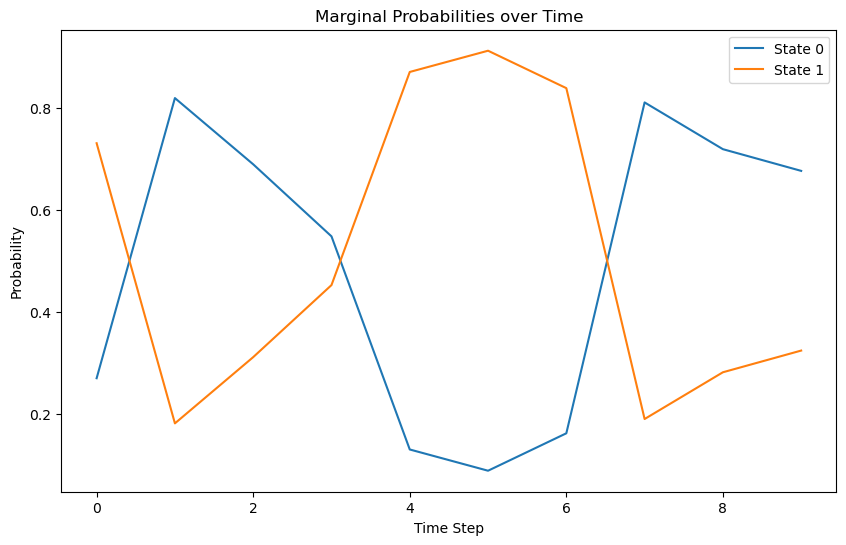

In [8]:
# Sum-Product Algorithm for Hidden Markov Models
# In this notebook, we derive and implement the sum-product algorithm for an HMM.

import numpy as np

class HMM_SumProduct:
    def __init__(self, A, B, pi):
        """
        Initialize the HMM parameters.
        A: State transition matrix (KxK)
        B: Observation probability matrix (KxM)
        pi: Initial state distribution (K)
        """
        self.A = A
        self.B = B
        self.pi = pi

    def alpha_recursion(self, observations):
        """
        Compute the forward messages (\( \alpha \)).
        """
        N = len(observations)
        K = self.A.shape[0]
        alpha = np.zeros((N, K))

        # Initialization
        alpha[0, :] = self.pi * self.B[:, observations[0]]

        # Recursion
        for t in range(1, N):
            for j in range(K):
                alpha[t, j] = np.sum(alpha[t - 1, :] * self.A[:, j]) * self.B[j, observations[t]]

        return alpha

    def beta_recursion(self, observations):
        """
        Compute the backward messages (\( \beta \)).
        """
        N = len(observations)
        K = self.A.shape[0]
        beta = np.zeros((N, K))

        # Initialization
        beta[N - 1, :] = 1

        # Recursion
        for t in range(N - 2, -1, -1):
            for i in range(K):
                beta[t, i] = np.sum(self.A[i, :] * self.B[:, observations[t + 1]] * beta[t + 1, :])

        return beta

    def compute_marginals(self, observations):
        """
        Compute the local marginals \( \gamma(z_n) \).
        """
        alpha = self.alpha_recursion(observations)
        beta = self.beta_recursion(observations)
        marginals = alpha * beta
        marginals /= np.sum(marginals, axis=1, keepdims=True)
        return marginals

    def likelihood(self, observations):
        """
        Compute the likelihood \( p(X) \).
        """
        alpha = self.alpha_recursion(observations)
        return np.sum(alpha[-1, :])

# Example: Initialize an HMM
np.random.seed(42)

A = np.array([[0.7, 0.3], [0.4, 0.6]])
B = np.array([[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]])
pi = np.array([0.6, 0.4])
hmm = HMM_SumProduct(A, B, pi)

# Simulated observations
observations = np.random.choice([0, 1, 2], size=10, p=[0.4, 0.4, 0.2])

# Compute alpha, beta, and marginals
alpha = hmm.alpha_recursion(observations)
beta = hmm.beta_recursion(observations)
marginals = hmm.compute_marginals(observations)
likelihood = hmm.likelihood(observations)

print("Alpha:", alpha)
print("Beta:", beta)
print("Marginals:", marginals)
print("Likelihood:", likelihood)

# Visualization
import matplotlib.pyplot as plt

# Plot marginal probabilities
plt.figure(figsize=(10, 6))
time_steps = range(len(observations))
for state in range(A.shape[0]):
    plt.plot(time_steps, marginals[:, state], label=f"State {state}")

plt.title("Marginal Probabilities over Time")
plt.xlabel("Time Step")
plt.ylabel("Probability")
plt.legend()
plt.show()


##  Scaling Factors

There is an important issue that must be addressed before we can make use of the forward-backward algorithm in practice. From the recursion relation (13.36), we note that at each step the new value $ \alpha(z_n) $ is obtained from the previous value $ \alpha(z_{n-1}) $ by multiplying by quantities $ p(z_n | z_{n-1}) $ and $ p(x_n | z_n) $. Because these probabilities are often significantly less than unity, as we work our way forward along the chain, the values of $ \alpha(z_n) $ can go to zero exponentially quickly. For moderate lengths of chain (say 100 or so), the calculation of the $ \alpha(z_n) $ will soon exceed the dynamic range of the computer, even if double precision floating point is used.

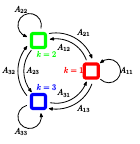

Fig.6 Transition diagram showing a model whose latent variables have three possible states corresponding to the three boxes. The black lines denote the elements of the transition matrix $A_jk$ .


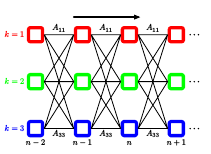

Fig.7 If we unfold the state transition diagram of Fig.6 over time, we obtain a lattice, or trellis, representation of the latent states. Each column of this diagram corresponds to one of the latent variables zn .

In the case of i.i.d. data, we implicitly circumvented this problem with the evaluation of likelihood functions by taking logarithms. Unfortunately, this will not help here because we are forming sums of products of small numbers (we are in fact implicitly summing over all possible paths through the lattice diagram of Fig.7). We therefore work with re-scaled versions of $ \alpha(z_n) $ and $ \beta(z_n) $ whose values remain of order unity. As we shall see, the corresponding scaling factors cancel out when we use these re-scaled quantities in the EM algorithm.

In (13.34), we defined

$$
\alpha(z_n) = p(x_1, \dots, x_n, z_n)
$$

representing the joint distribution of all the observations up to $ x_n $ and the latent variable $ z_n $. Now we define a normalized version of $ \alpha $ given by

$$
\alpha^\prime(z_n) = \frac{p(z_n | x_1, \dots, x_n)}{p(x_1, \dots, x_n)} \tag{13.55}
$$

which we expect to be well behaved numerically because it is a probability distribution over $ K $ variables for any value of $ n $.

In order to relate the scaled and original alpha variables, we introduce scaling factors defined by conditional distributions over the observed variables

$$
c_n = p(x_n | x_1, \dots, x_{n-1}) \tag{13.56}
$$

From the product rule, we then have

$$
p(x_1, \dots, x_n) = \prod_{m=1}^{n} c_m \tag{13.57}
$$

and so

$$
\alpha(z_n) = p(z_n | x_1, \dots, x_n) p(x_1, \dots, x_n) = \prod_{m=1}^{n} c_m \alpha^\prime(z_n) \tag{13.58}
$$

We can then turn the recursion equation (13.36) for \( \alpha \) into one for \( \alpha^\prime \) given by

$$
\alpha^\prime(z_n) = p(x_n | z_n) \frac{1}{c_n} \alpha^\prime(z_{n-1}) p(z_n | z_{n-1}) \tag{13.59}
$$

Note that at each stage of the forward message passing phase, used to evaluate $ \alpha^\prime(z_n) $, we have to evaluate and store $ c_n $, which is easily done because it is the coefficient that normalizes the right-hand side of (13.59) to give $ \alpha^\prime(z_n) $.

We can similarly define re-scaled variables $ \beta^\prime(z_n) $ using

$$
\beta(z_n) = \prod_{m=n+1}^{N} c_m \beta^\prime(z_n) \tag{13.60}
$$

which will again remain within machine precision because, from (13.35), the quantities $ \beta^\prime(z_n) $ are simply the ratio of two conditional probabilities:

$$
\beta^\prime(z_n) = \frac{p(x_{n+1}, \dots, x_N | z_n)}{p(x_{n+1}, \dots, x_N | x_1, \dots, x_n)} \tag{13.61}
$$

The recursion result (13.38) for $ \beta $ then gives the following recursion for the re-scaled variables

$$
\beta^\prime(z_n) = c_{n+1} \beta^\prime(z_{n+1}) p(x_{n+1} | z_{n+1}) p(z_{n+1} | z_n) \tag{13.62}
$$

In applying this recursion relation, we make use of the scaling factors $ c_n $ that were previously computed in the $ \alpha $ phase. From (13.57), we see that the likelihood function can be found using

$$
p(X) = \prod_{n=1}^{N} c_n \tag{13.63}
$$

Similarly, using (13.33) and (13.43), together with (13.63), we see that the required marginals are given by

$$
\gamma(z_n) = \alpha^\prime(z_n) \beta^\prime(z_n) \tag{13.64}
$$

and

$$
\xi(z_{n-1}, z_n) = c_n \alpha^\prime(z_{n-1}) p(x_n | z_n) p(z_n | z_{n-1}) \beta^\prime(z_n) \tag{13.65}
$$

Finally, we note that there is an alternative formulation of the forward-backward algorithm (Jordan, 2007) in which the backward pass is defined by a recursion based on the quantities $ \gamma(z_n) = \alpha^\prime(z_n) $ instead of using $ \beta^\prime(z_n) $. This $ \alpha-\gamma $ recursion requires that the forward pass be completed first so that all the quantities $ \alpha^\prime(z_n) $ are available for the backward pass, whereas the forward and backward passes of the $ \alpha-\beta $ algorithm can be done independently. Although these two algorithms have comparable computational cost, the $ \alpha-\beta $ version is the most commonly encountered one in the case of hidden Markov models, whereas for linear dynamical systems a recursion analogous to the $ \alpha-\gamma $ form is more usual.


In [ ]:
import numpy as np

# Define the model parameters
N = 5  # Number of time steps (sequence length)
K = 3  # Number of hidden states

# Transition probabilities (p(z_n | z_{n-1}))
A = np.array([[0.7, 0.2, 0.1],
              [0.3, 0.5, 0.2],
              [0.4, 0.4, 0.2]])

# Emission probabilities (p(x_n | z_n))
B = np.array([[0.5, 0.4, 0.1],
              [0.3, 0.6, 0.1],
              [0.2, 0.3, 0.5]])

# Initial state probabilities (p(z_1))
pi = np.array([0.6, 0.3, 0.1])

# Observations (x_n)
X = np.array([0, 1, 2, 0, 1])  # Example observation sequence (5 time steps)

# Function to calculate the forward pass (alpha with scaling)
def forward_pass(A, B, pi, X):
    N = len(X)
    K = len(pi)
    
    alpha = np.zeros((N, K))  # alpha values
    scaling_factors = np.zeros(N)  # Scaling factors

    # Initialize alpha for time step 0
    alpha[0] = pi * B[:, X[0]]
    scaling_factors[0] = np.sum(alpha[0])
    alpha[0] /= scaling_factors[0]  # Normalize

    # Recursion for the forward pass
    for n in range(1, N):
        for k in range(K):
            alpha[n, k] = np.sum(alpha[n-1] * A[:, k]) * B[k, X[n]]
        scaling_factors[n] = np.sum(alpha[n])
        alpha[n] /= scaling_factors[n]  # Normalize
    
    return alpha, scaling_factors

# Function to calculate the backward pass (beta with scaling)
def backward_pass(A, B, X, scaling_factors):
    N = len(X)
    K = len(scaling_factors)
    
    beta = np.ones((N, K))  # Initialize beta values
    
    # Recursion for the backward pass
    for n in range(N-2, -1, -1):
        for k in range(K):
            # Compute the backward probability for state k at time step n
            # Ensure correct matrix dimensions: A[k, :] * B[:, X[n+1]] (both of shape (K,)) and beta[n+1, :]
            beta[n, k] = np.sum(A[k, :] * B[:, X[n+1]] * beta[n+1, :])
        
        # Normalize beta[n] by the scaling factor for the next observation
        beta[n] /= scaling_factors[n+1]  # Normalize by the scaling factors
    
    return beta

# Function to calculate the marginals gamma(z_n) and joint marginals xi(z_{n-1}, z_n)
def calculate_marginals(alpha, beta, scaling_factors, A, B, X):
    N, K = alpha.shape
    gamma = np.zeros((N, K))
    xi = np.zeros((N-1, K, K))

    # Compute gamma (marginals)
    for n in range(N):
        gamma[n] = alpha[n] * beta[n]
        gamma[n] /= np.sum(gamma[n])  # Normalize
    
    # Compute xi (joint marginals)
    for n in range(N-1):
        for i in range(K):
            for j in range(K):
                xi[n, i, j] = alpha[n, i] * A[i, j] * B[j, X[n+1]] * beta[n+1, j]
        xi[n] /= np.sum(xi[n])  # Normalize

    return gamma, xi

# Apply forward-backward algorithm
alpha, scaling_factors = forward_pass(A, B, pi, X)
beta = backward_pass(A, B, X, scaling_factors)
gamma, xi = calculate_marginals(alpha, beta, scaling_factors, A, B, X)

# Output the results
print("Alpha (forward probabilities):")
print(alpha)
print("\nScaling factors:")
print(scaling_factors)
print("\nBeta (backward probabilities):")
print(beta)
print("\nGamma (state marginals):")
print(gamma)
print("\nXi (joint marginals):")
print(xi)


In [ ]:
# Define the model parameters
N = 5  # Number of time steps (sequence length)
K = 3  # Number of hidden states

# Transition probabilities (p(z_n | z_{n-1}))
A = [
    [0.7, 0.2, 0.1],
    [0.3, 0.5, 0.2],
    [0.4, 0.4, 0.2]
]

# Emission probabilities (p(x_n | z_n))
B = [
    [0.5, 0.4, 0.1],
    [0.3, 0.6, 0.1],
    [0.2, 0.3, 0.5]
]

# Initial state probabilities (p(z_1))
pi = [0.6, 0.3, 0.1]

# Observations (x_n)
X = [0, 1, 2, 0, 1]  # Example observation sequence (5 time steps)

# Function to calculate the forward pass (alpha with scaling)
def forward_pass(A, B, pi, X):
    N = len(X)
    K = len(pi)
    
    alpha = [[0] * K for _ in range(N)]  # Initialize alpha values
    scaling_factors = [0] * N  # Scaling factors

    # Initialize alpha for time step 0
    for k in range(K):
        alpha[0][k] = pi[k] * B[k][X[0]]
    scaling_factors[0] = sum(alpha[0])
    for k in range(K):
        alpha[0][k] /= scaling_factors[0]  # Normalize

    # Recursion for the forward pass
    for n in range(1, N):
        for k in range(K):
            alpha[n][k] = sum(alpha[n-1][i] * A[i][k] for i in range(K)) * B[k][X[n]]
        scaling_factors[n] = sum(alpha[n])
        for k in range(K):
            alpha[n][k] /= scaling_factors[n]  # Normalize
    
    return alpha, scaling_factors

# Function to calculate the backward pass (beta with scaling)
# Function to calculate the backward pass (beta with scaling)
def backward_pass(A, B, X, scaling_factors):
    N = len(X)
    K = len(scaling_factors)
    
    beta = [[1] * K for _ in range(N)]  # Initialize beta values
    
    # Recursion for the backward pass
    for n in range(N-2, -1, -1):  # Start from N-2 because we don't have n+1 for N-1
        for k in range(K):
            beta[n][k] = sum(A[k][i] * B[i][X[n+1]] * beta[n+1][i] for i in range(K))
        
        # Normalize beta[n] by the scaling factor for the next observation
        beta[n] = [b / scaling_factors[n+1] for b in beta[n]]  # Normalize by the scaling factors
    
    return beta


# Function to calculate the marginals gamma(z_n) and joint marginals xi(z_{n-1}, z_n)
def calculate_marginals(alpha, beta, scaling_factors, A, B, X):
    N, K = len(alpha), len(alpha[0])
    gamma = [[0] * K for _ in range(N)]
    xi = [[[0] * K for _ in range(K)] for _ in range(N-1)]

    # Compute gamma (marginals)
    for n in range(N):
        norm = sum(alpha[n][i] * beta[n][i] for i in range(K))
        for k in range(K):
            gamma[n][k] = (alpha[n][k] * beta[n][k]) / norm  # Normalize
    
    # Compute xi (joint marginals)
    for n in range(N-1):
        for i in range(K):
            for j in range(K):
                xi[n][i][j] = (alpha[n][i] * A[i][j] * B[j][X[n+1]] * beta[n+1][j])
        norm = sum(xi[n][i][j] for i in range(K) for j in range(K))
        for i in range(K):
            for j in range(K):
                xi[n][i][j] /= norm  # Normalize

    return gamma, xi

# Apply forward-backward algorithm
alpha, scaling_factors = forward_pass(A, B, pi, X)
beta = backward_pass(A, B, X, scaling_factors)
gamma, xi = calculate_marginals(alpha, beta, scaling_factors, A, B, X)

# Output the results
print("Alpha (forward probabilities):")
print(alpha)
print("\nScaling factors:")
print(scaling_factors)
print("\nBeta (backward probabilities):")
print(beta)
print("\nGamma (state marginals):")
print(gamma)
print("\nXi (joint marginals):")
print(xi)
